### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('precision', 4)

### Load the dataset

In [3]:
loan = pd.read_csv("Bank_Personal_Loan.csv")
loan.drop(["ID"], axis=1, inplace=True)
loan.columns = loan.columns.str.replace(" ", "_")
loan.shape

(5000, 13)

In [4]:
loan.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
for i in loan.columns:
    print(f"Column: {i}")
    print(loan[i].unique())

Column: Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Column: Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Column: Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
Column: ZIP_Co

### Data Info

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP_Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [7]:
# categorical variables
cat_var = ["ZIP_Code", "Family", "Education", "CreditCard", "Securities_Account", "CD_Account", "Online"]
# continuous variables
con_var = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
# target
target = ["Personal_Loan"]

loan = loan[cat_var + con_var + target]
loan.head()

,ZIP_Code,Family,Education,CreditCard,Securities_Account,CD_Account,Online,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan
0,91107,4,1,0,1,0,0,25,1,49,1.6,0,0
1,90089,3,1,0,1,0,0,45,19,34,1.5,0,0
2,94720,1,1,0,0,0,0,39,15,11,1.0,0,0
3,94112,1,2,0,0,0,0,35,9,100,2.7,0,0
4,91330,4,2,1,0,0,0,35,8,45,1.0,0,0


#### Here CreditCard is the target and rest are predictors

### EDA to compare all attributes visually to check for relationships that can be exploited using Pairplot

<Figure size 3600x3600 with 0 Axes>

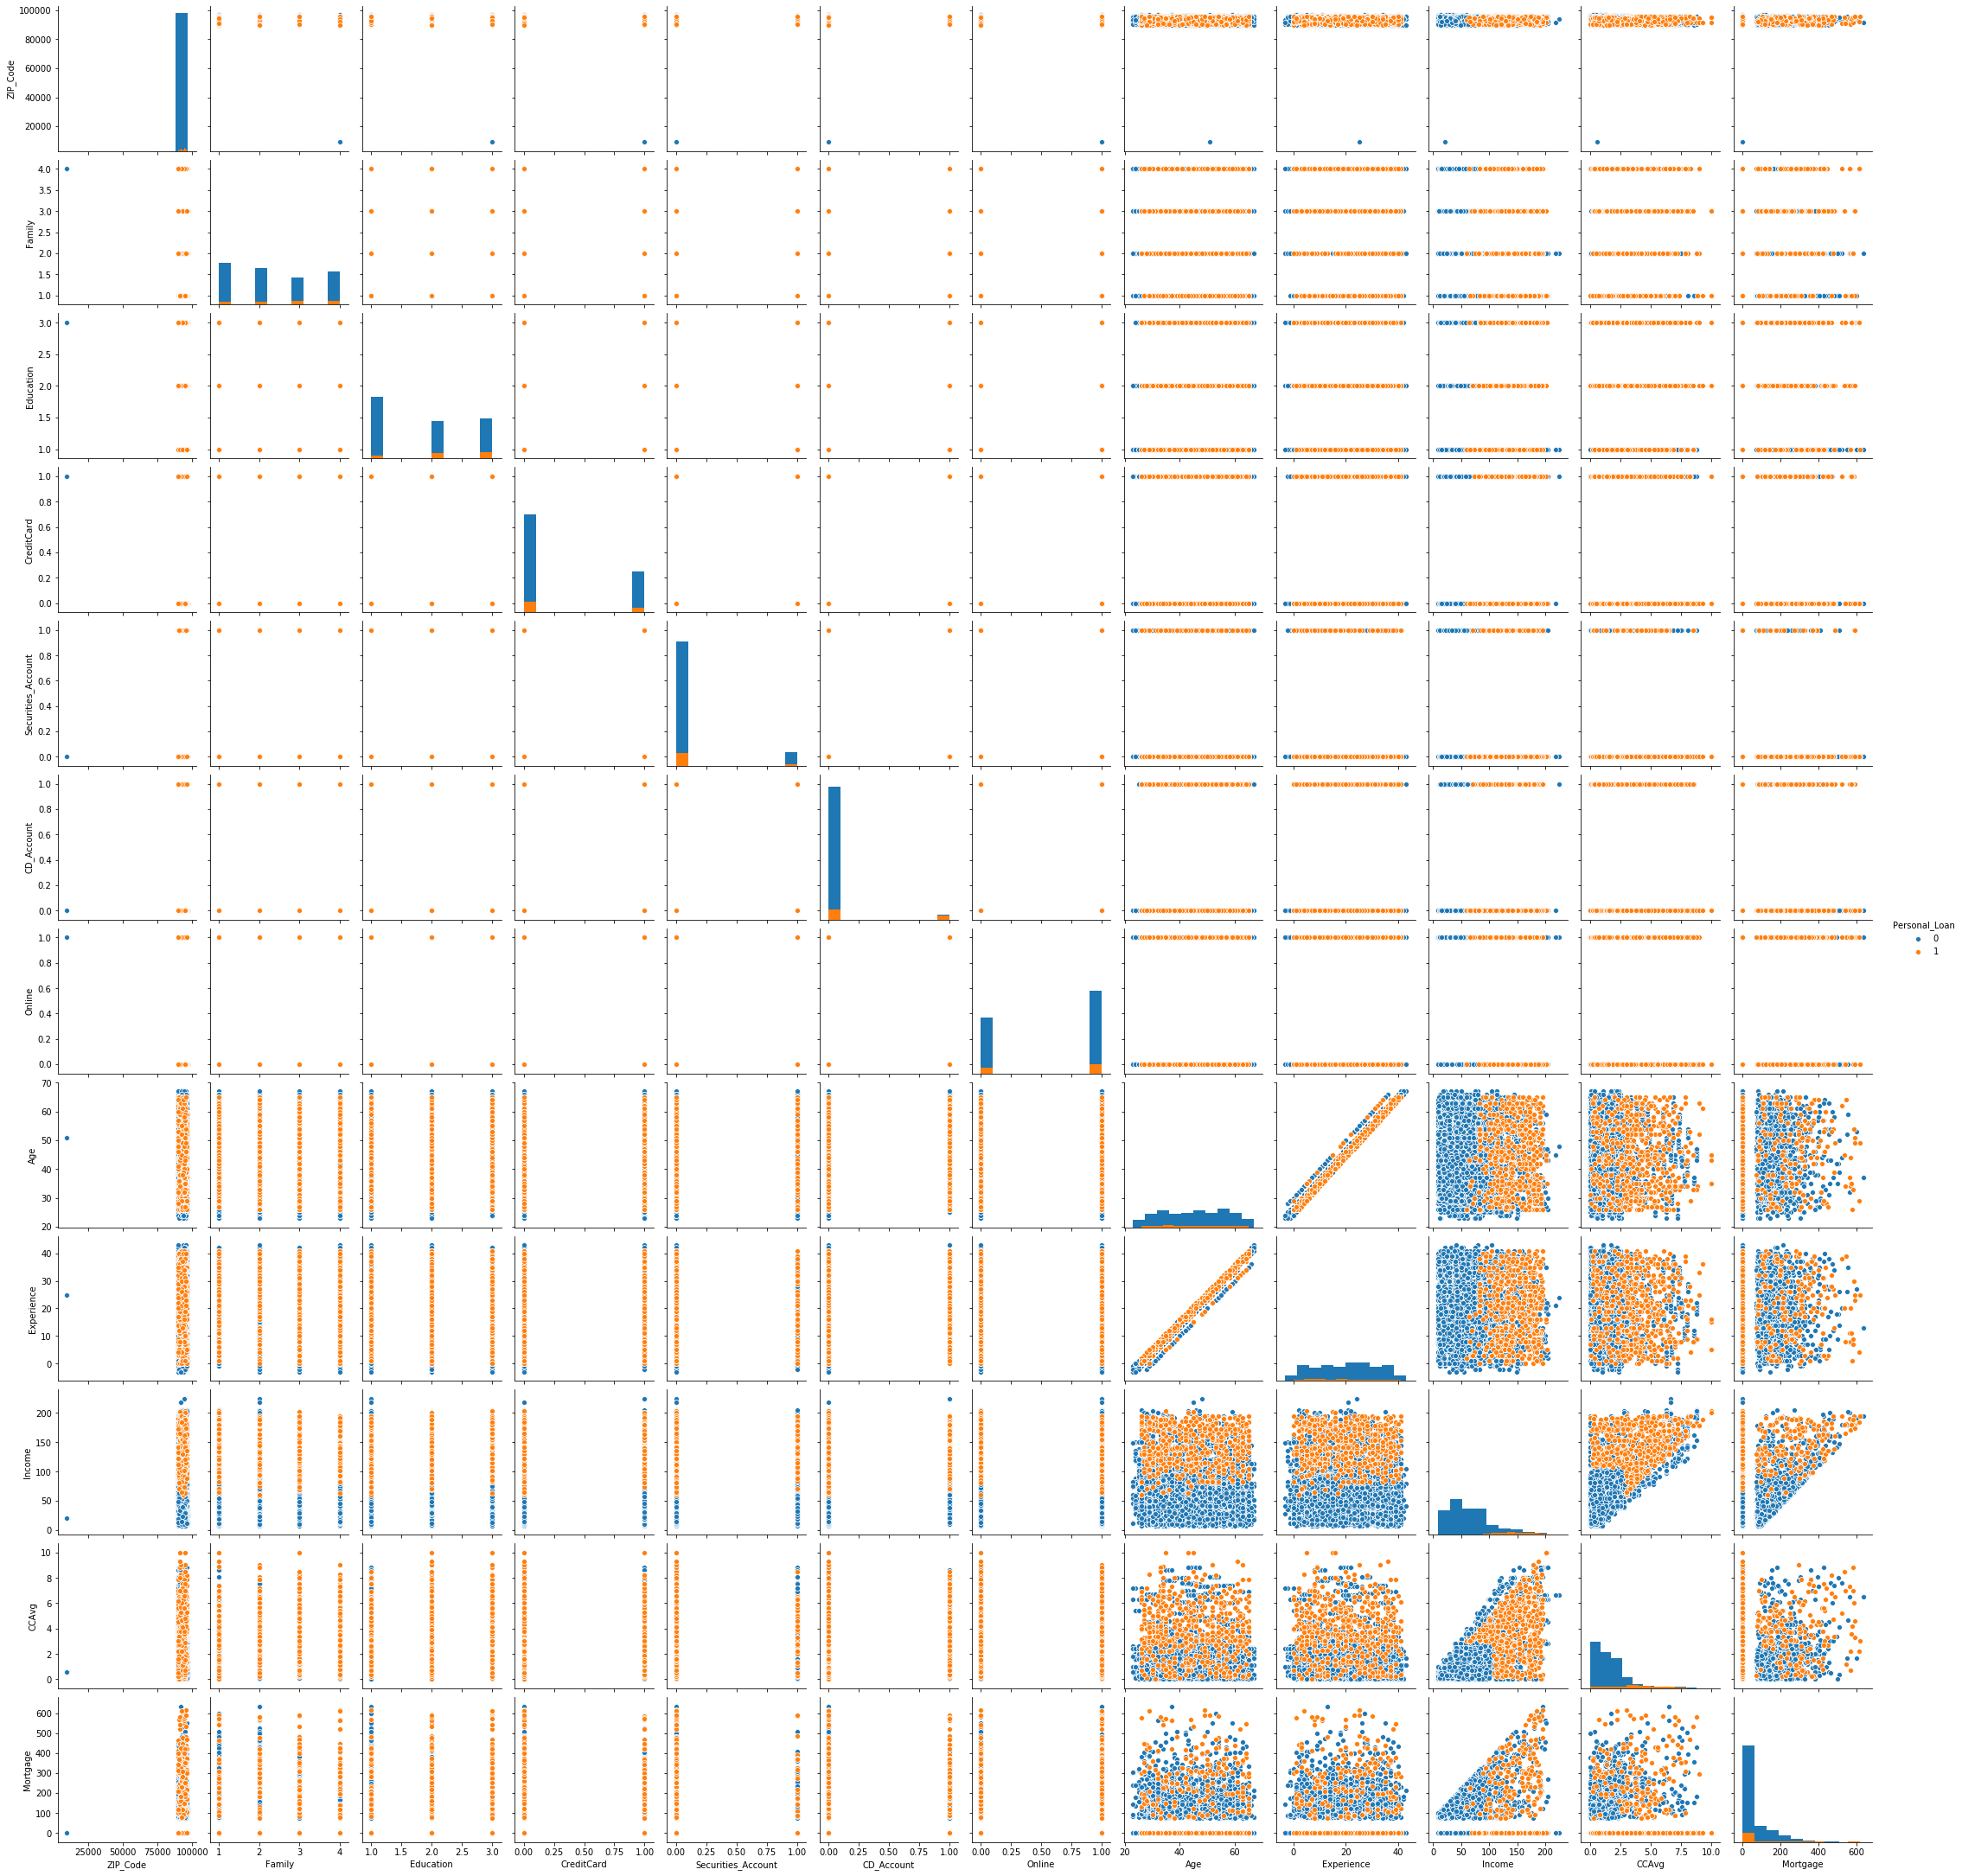

In [8]:
plt.figure(figsize=(50,50))
sns.pairplot(loan, diag_kind='hist', hue='Personal_Loan')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

### Inference from the above plot
- Age and Experience have normal distribution
- Income, CCAvg, Mortgage have right skewed distribution
- Experience and age has positive correlation

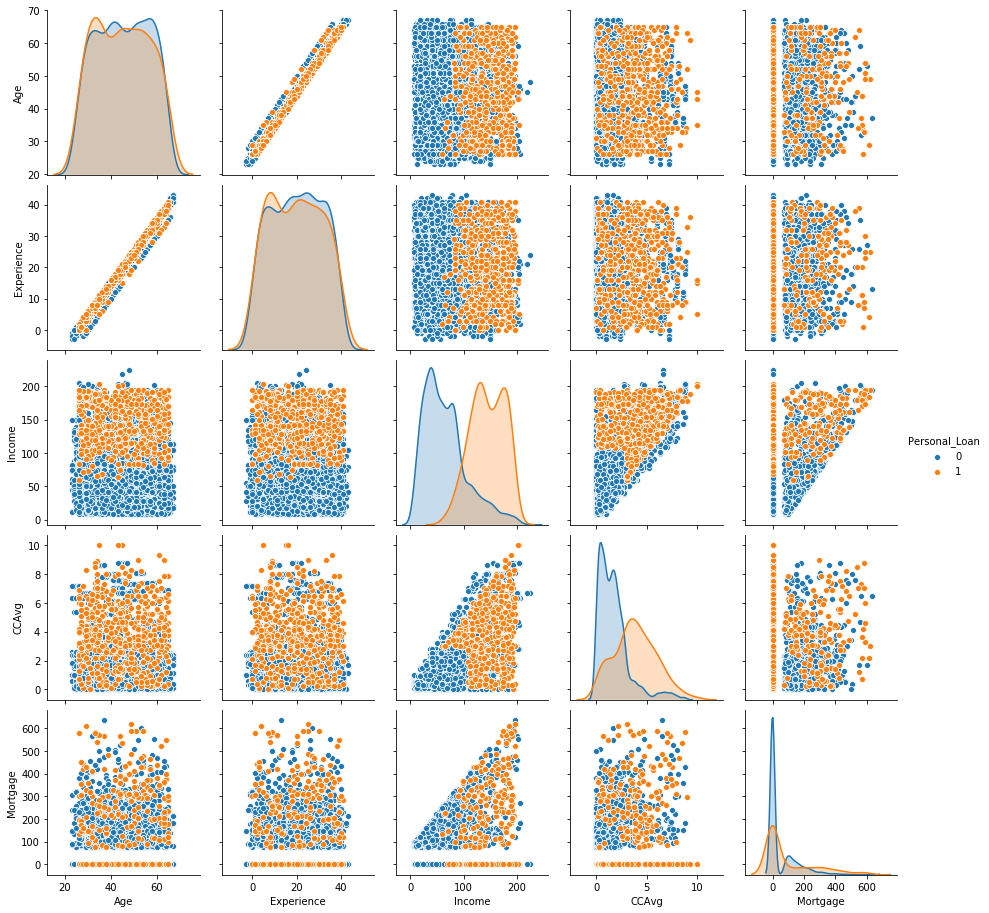

In [9]:
sns.pairplot( loan[con_var+target] , hue='Personal_Loan')
plt.show()

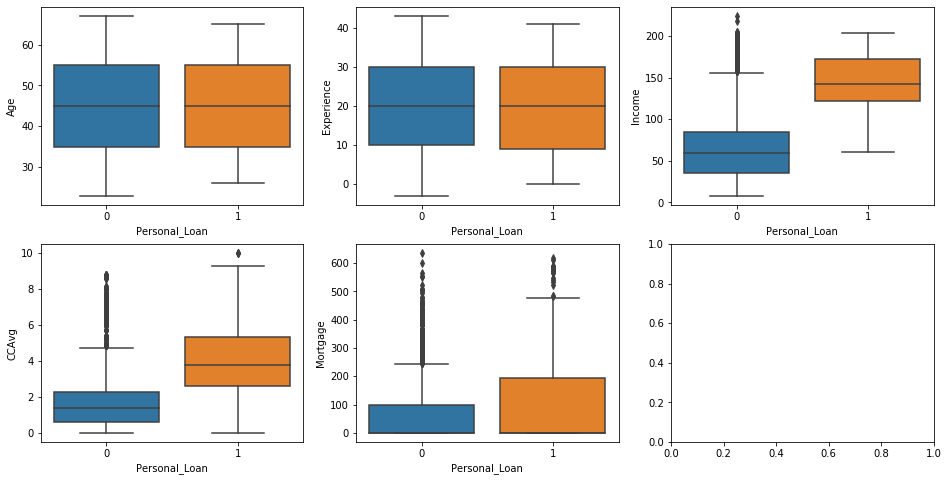

In [10]:
fig, ax = plt.subplots(2,3, figsize=(16,8))
ax = ax.flatten()
for i in range(len(con_var)):
    sns.boxplot('Personal_Loan', con_var[i], data = loan, ax = ax[i])
plt.show()

### Inferences
- People with more income have availed the loan
- People with more average credit card spend have availed the loan
- People with more mortgage value have availed the loan
- Distribution of Age and Experience is similar in both categories

### Statistical Significance of Continuous Variables

In [11]:
import statsmodels.api as sm
for i in con_var:
    data = sm.formula.ols(i+"~Personal_Loan", data = loan).fit()
    pval = sm.stats.anova_lm(data)["PR(>F)"][0]
    if pval<0.05:
        print(f"{i} is significant")
    else:
        print(f"{i} is not significant")

Age is not significant
Experience is not significant
Income is significant
CCAvg is significant
Mortgage is significant


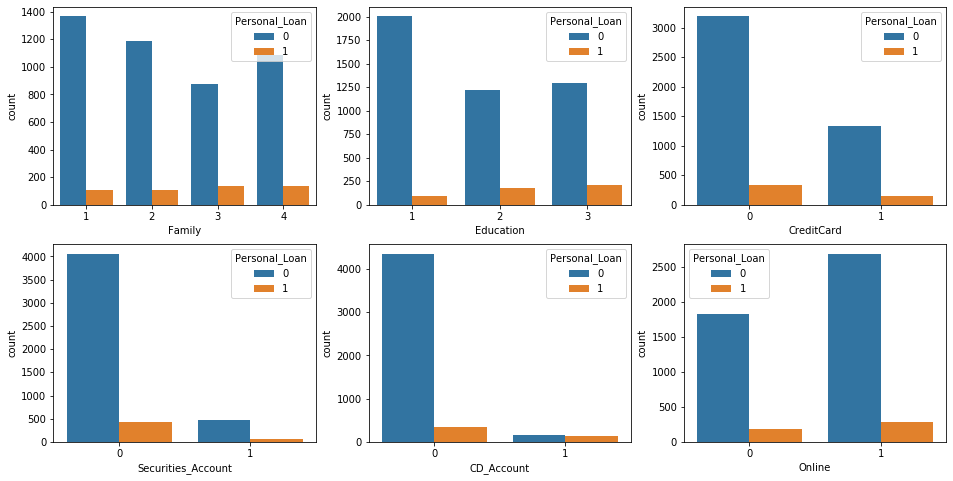

In [12]:
plot_var = cat_var[1:]

fig, ax = plt.subplots(2,3, figsize=(16,8))
ax = ax.flatten()
for i in range(len(plot_var)):
    sns.countplot(plot_var[i], hue='Personal_Loan', data=loan, ax = ax[i])
plt.show()

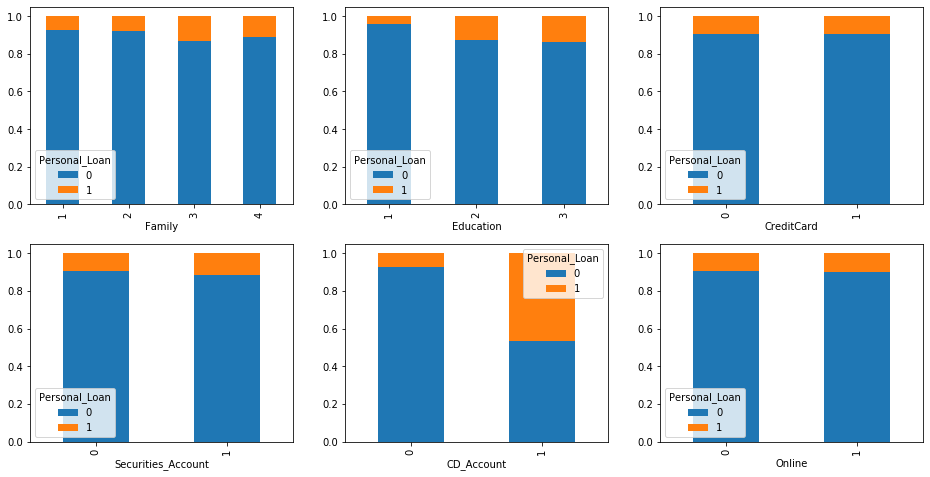

In [13]:
fig, ax = plt.subplots(2,3, figsize=(16,8))
ax = ax.flatten()
for i in range(len(plot_var)):
    data = pd.crosstab(loan[plot_var[i]], loan['Personal_Loan'], normalize='index')
    data.plot.bar(stacked=True, ax = ax[i])
plt.show()

### Inference from above plots
- Almost 50% Customers with CD Account have availed loan, this can be a target area for campaign and advertisement
- More Customers with education level 2 and 3 have availed loan
- Customers with family size 3 has more number of loans availed

### Statistical Significance of Categorical variables

In [14]:
import researchpy as rp
for i in cat_var:
    _, data = rp.crosstab(loan[i], loan["Personal_Loan"], test='chi-square')
    pval, cramer = data['results'][1:]
    if pval < 0.05:
        print(f"{i} is significant, cramer's value :{cramer}")
    else:
        print(f"{i} is not significant, cramer's value :{cramer}")

ZIP_Code is not significant, cramer's value :0.298
Family is significant, cramer's value :0.077
Education is significant, cramer's value :0.1492
CreditCard is not significant, cramer's value :0.0028
Securities_Account is not significant, cramer's value :0.022
CD_Account is significant, cramer's value :0.3164
Online is not significant, cramer's value :0.0063


### List of significant Variables
    We can test the model with only these variables to measure impact on the performance

In [15]:
final_con = ["Income","CCAvg","Mortgage"]
final_cat = ["Family","Education","CD_Account"]

### Count for Personal Loan

In [16]:
loan.groupby("Personal_Loan").count().iloc[:,0]

Personal_Loan
0    4520
1     480
Name: ZIP_Code, dtype: int64

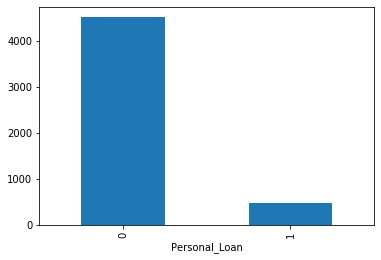

In [17]:
loan.groupby("Personal_Loan").count().iloc[:,0].plot.bar()
plt.show()

### Separate the independent variable X and dependent variable Y

In [18]:
X = pd.get_dummies( loan[con_var+cat_var], columns=cat_var, drop_first=True )
Y = loan[target]

### 1.8 Split the data into train and test set:(70/30)

In [19]:
def split_data(X, Y, seed=1):
    from sklearn.model_selection import train_test_split
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8, random_state=seed, stratify=Y)
    return (xtrain, xtest, ytrain, ytest)

xtrain, xtest, ytrain, ytest = split_data(X, Y)

### Preprocessing Data for performing Model

In [20]:
def preprocess(x1, x2=None):
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
    if x2 is not None:
        x2 = pd.DataFrame(sc.transform(x2), columns=x2.columns)
        return (x1, x2)
    else:
        return x1
xtrain_sc, xtest_sc = preprocess(xtrain, xtest)

### Train a Decision Tree 

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(xtrain_sc, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### Making the Predictions

In [22]:
def eval_model(model, xtrain, xtest, ytrain, ytest):
    from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score
    trainpred = model.predict(xtrain)
    testpred = model.predict(xtest)
    trainpred_prob = model.predict_proba(xtrain)[:,1]
    testpred_prob = model.predict_proba(xtest)[:,1]
    
    print("Train Accuracy Score: %.4f, F1 Score : %.4f"%(accuracy_score(ytrain, trainpred), f1_score(ytrain, trainpred)))
    print("Train ROC AUC Score: %.4f" %roc_auc_score(ytrain, trainpred_prob))
    print("Test Accuracy Score: %.4f, F1 Score : %.4f"%(accuracy_score(ytest, testpred), f1_score(ytest, testpred)))
    print("Train ROC AUC Score: %.4f"%roc_auc_score(ytest, testpred_prob))
    
    fpr, tpr,_ = roc_curve(ytrain, trainpred_prob)
    plt.plot(fpr, tpr, label="Train ROC Curve")
    fpr, tpr,_ = roc_curve(ytest, testpred_prob)
    plt.plot(fpr, tpr, label="Test ROC Curve")
    plt.legend()
    plt.show()

### Evaluation of the model

Train Accuracy Score: 1.0000, F1 Score : 1.0000
Train ROC AUC Score: 1.0000
Test Accuracy Score: 0.9780, F1 Score : 0.8854
Train ROC AUC Score: 0.9366


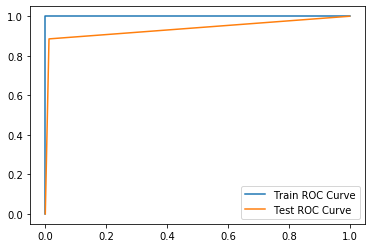

In [23]:
eval_model(dtree, xtrain_sc, xtest_sc, ytrain, ytest)

## Model using only significant variables

Train Accuracy Score: 1.0000, F1 Score : 1.0000
Train ROC AUC Score: 1.0000
Test Accuracy Score: 0.9820, F1 Score : 0.9082
Train ROC AUC Score: 0.9575


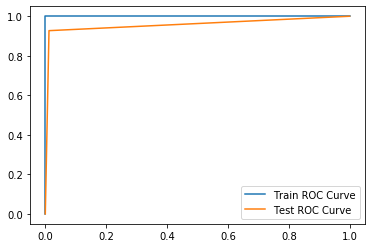

In [24]:
X = pd.get_dummies( loan[final_cat+final_con], columns=final_cat, drop_first=True )
Y = loan[target]

xtrain, xtest, ytrain, ytest = split_data(X, Y)
xtrain_sc, xtest_sc = preprocess(xtrain, xtest)

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(xtrain_sc, ytrain)

eval_model(dtree, xtrain_sc, xtest_sc, ytrain, ytest)

### Model using all variables and with only significant variables have same performance. Hence we will use only the significant variables

## Import all the algorithms to test

#### Prepare an array with all the algorithms

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
seed=7

models = []
models.append( ('RF', RandomForestClassifier(random_state=seed)) )
models.append( ('LR', LogisticRegression(random_state=seed)) )
models.append( ('DT', DecisionTreeClassifier(random_state=seed)) )
models.append( ('NB', GaussianNB()) )

#### The X and Y data

In [27]:
X = pd.get_dummies( loan[final_cat+final_con], columns=final_cat, drop_first=True )
Y = loan["Personal_Loan"]

xtrain, xtest, ytrain, ytest = split_data(X, Y, seed=seed)
xtrain_sc, xtest_sc = preprocess(xtrain, xtest)

#### Run the algorithms and print the results


Training the model for : RF 

Train Accuracy Score: 1.0000, F1 Score : 1.0000
Train ROC AUC Score: 1.0000
Test Accuracy Score: 0.9840, F1 Score : 0.9111
Train ROC AUC Score: 0.9976


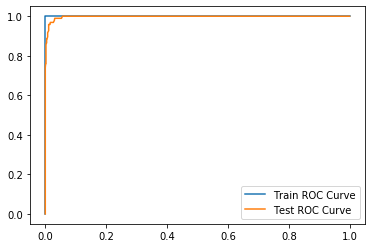


Training the model for : LR 

Train Accuracy Score: 0.9637, F1 Score : 0.7865
Train ROC AUC Score: 0.9680
Test Accuracy Score: 0.9420, F1 Score : 0.6420
Train ROC AUC Score: 0.9260


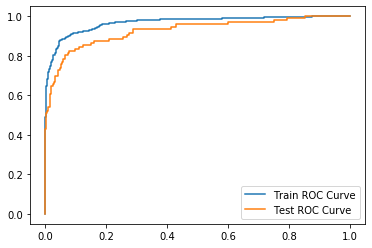


Training the model for : DT 

Train Accuracy Score: 1.0000, F1 Score : 1.0000
Train ROC AUC Score: 1.0000
Test Accuracy Score: 0.9790, F1 Score : 0.8865
Train ROC AUC Score: 0.9232


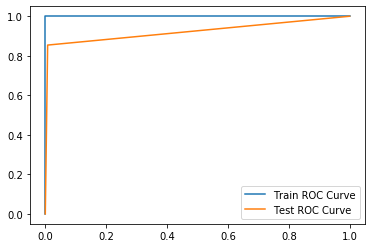


Training the model for : NB 

Train Accuracy Score: 0.8862, F1 Score : 0.5027
Train ROC AUC Score: 0.9301
Test Accuracy Score: 0.8880, F1 Score : 0.5172
Train ROC AUC Score: 0.9182


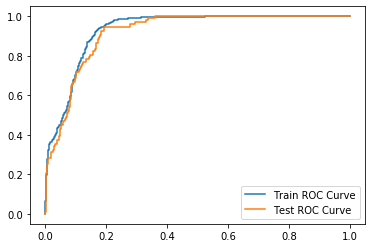

In [28]:
for name, model in models:
    print("\nTraining the model for : %s \n"%name)
    model.fit(xtrain_sc, ytrain)

    eval_model(model, xtrain_sc, xtest_sc, ytrain, ytest)

#### Comparison of various algorithms

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=10,random_state=seed, shuffle=True)

X = pd.get_dummies( loan[final_cat+final_con], columns=final_cat, drop_first=True )
Y = loan["Personal_Loan"]
X_sc = preprocess(X)

results = []
names = []

for name, model in models:
    scores = cross_val_score(model, X_sc, Y, cv=cv, scoring='roc_auc', n_jobs=-1)
    results.append(scores)
    names.append(name)
    print("For %s model: %f (%f)"%(name, scores.mean(), scores.std()))

For RF model: 0.998212 (0.001090)
For LR model: 0.960343 (0.012369)
For DT model: 0.951115 (0.019518)
For NB model: 0.926295 (0.012762)


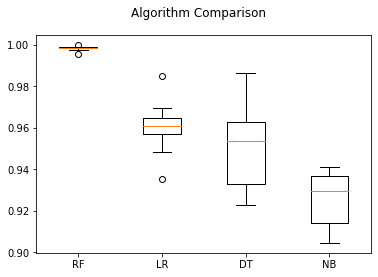

In [30]:
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()